<a href="https://colab.research.google.com/github/chandini2595/DeepLearning-Experiments/blob/main/Regression_California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error, explained_variance_score, mean_absolute_percentage_error
import wandb

In [9]:
wandb.init(project="california-housing-deeplearning")

In [10]:
# Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # Target variable

# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale feature values using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

    # First hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    # Second hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    # Third hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    # Fourth hidden layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    # Output layer
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', tf.keras.metrics.RootMeanSquaredError()]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Reduce learning rate if validation loss plateaus
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

In [13]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.2257 - mae: 1.6239 - root_mean_squared_error: 2.0260 - val_loss: 0.7271 - val_mae: 0.5876 - val_root_mean_squared_error: 0.8527 - learning_rate: 0.0010
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.9841 - mae: 0.7552 - root_mean_squared_error: 0.9916 - val_loss: 0.5173 - val_mae: 0.4996 - val_root_mean_squared_error: 0.7192 - learning_rate: 0.0010
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7355 - mae: 0.6490 - root_mean_squared_error: 0.8575 - val_loss: 0.4907 - val_mae: 0.4676 - val_root_mean_squared_error: 0.7005 - learning_rate: 0.0010
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6138 - mae: 0.5842 - root_mean_squared_error: 0.7834 - val_loss: 0.4479 - val_mae: 0.4478 - val_root_mean_squared_error: 0.6693 - learning_rate: 0.0010
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5609 - mae: 0.5582 - root_mean_squared_error: 0.7489 - val_loss: 0.4682 - val_mae

In [14]:
train_predictions = model.predict(X_train_scaled).flatten()
test_predictions = model.predict(X_test_scaled).flatten()

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [15]:
# Calculate metrics
train_mse = tf.keras.losses.MSE(y_train, train_predictions).numpy()
test_mse = tf.keras.losses.MSE(y_test, test_predictions).numpy()

train_rmse = tf.keras.metrics.RootMeanSquaredError()(y_train, train_predictions).numpy()
test_rmse = tf.keras.metrics.RootMeanSquaredError()(y_test, test_predictions).numpy()

train_mae = tf.keras.losses.MAE(y_train, train_predictions).numpy()
test_mae = tf.keras.losses.MAE(y_test, test_predictions).numpy()

# Additional metrics
train_median_ae = median_absolute_error(y_train, train_predictions)
test_median_ae = median_absolute_error(y_test, test_predictions)

train_explained_var = explained_variance_score(y_train, train_predictions)
test_explained_var = explained_variance_score(y_test, test_predictions)

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

# Print results
print("\n🔹 Training Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"Median Absolute Error: {train_median_ae:.4f}")
print(f"Explained Variance Score: {train_explained_var:.4f}")
print(f"Mean Absolute Percentage Error: {train_mape:.4f}")

print("\n🔹 Test Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"Median Absolute Error: {test_median_ae:.4f}")
print(f"Explained Variance Score: {test_explained_var:.4f}")
print(f"Mean Absolute Percentage Error: {test_mape:.4f}")


🔹 Training Metrics:
MSE: 0.3187
RMSE: 0.5646
MAE: 0.3983
Median Absolute Error: 0.2870
Explained Variance Score: 0.7617
Mean Absolute Percentage Error: 0.2323

🔹 Test Metrics:
MSE: 0.3285
RMSE: 0.5731
MAE: 0.4030
Median Absolute Error: 0.2890
Explained Variance Score: 0.7494
Mean Absolute Percentage Error: 0.2404


In [16]:
wandb.log({
    "train_mse": train_mse,
    "test_mse": test_mse,
    "train_rmse": train_rmse,
    "test_rmse": test_rmse,
    "train_mae": train_mae,
    "test_mae": test_mae,
    "train_median_ae": train_median_ae,
    "test_median_ae": test_median_ae,
    "train_explained_var": train_explained_var,
    "test_explained_var": test_explained_var,
    "train_mape": train_mape,
    "test_mape": test_mape
})

In [17]:
# Save the trained model
model.save('deep_housing_model.h5')
wandb.save('deep_housing_model.h5')

['/content/wandb/run-20250219_183342-3crzcmxi/files/deep_housing_model.h5']

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,491 (185.52 KB)

 Trainable params: 46,529 (181.75 KB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

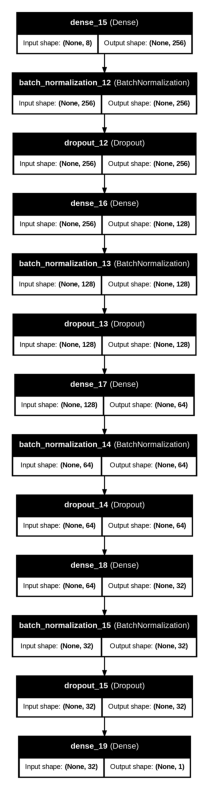

In [20]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Define the custom loss function explicitly
custom_objects = {"mse": tf.keras.losses.MeanSquaredError()}

# Load the trained model with custom objects
model = tf.keras.models.load_model('/content/deep_housing_model.h5', custom_objects=custom_objects)

# Print Model Summary
model.summary()

# Generate and Save Model Diagram
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display model architecture image
img = plt.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()